In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [3]:
#import data.cvsb

In [7]:
df = pd.read_csv(
     'data/btc-eth-prices-original.csv',
      index_col=0,
      parse_dates=True)

In [8]:
df.head()

,Bitcoin,Ether
Timestamp,,
2017-04-02,1099.169125,48.55
2017-04-03,1141.813000,44.13
2017-04-04,1141.600363,44.43
2017-04-05,1133.079314,44.90
2017-04-06,1196.307937,43.23


<AxesSubplot:xlabel='Timestamp'>

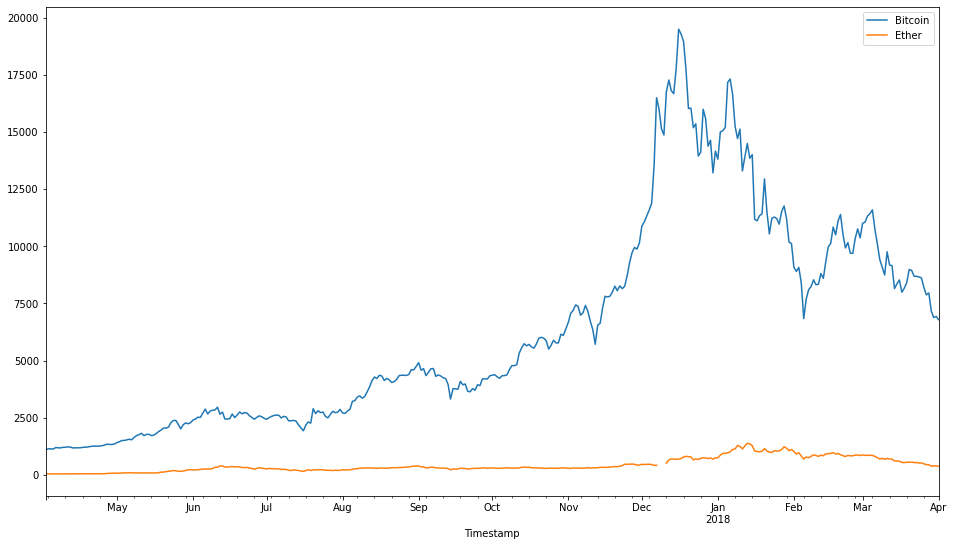

In [9]:
df.plot(figsize=(16,9))

<AxesSubplot:xlabel='Timestamp'>

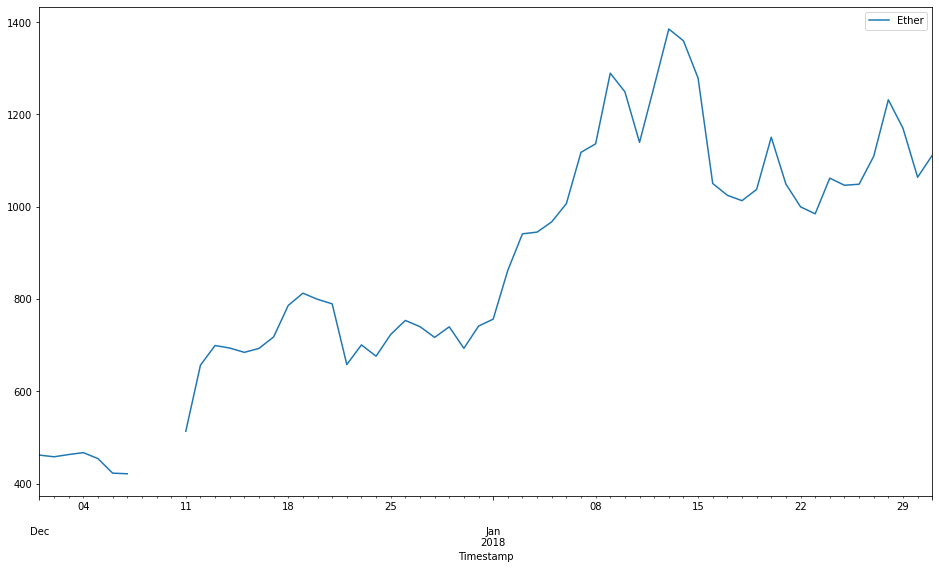

In [10]:
#there seems to be some data missing in Ether between Dec2017 and Jan 2018.
df.loc['2017-12':'2018-01'].plot(y='Ether', figsize=(16,9))

<AxesSubplot:xlabel='Timestamp'>

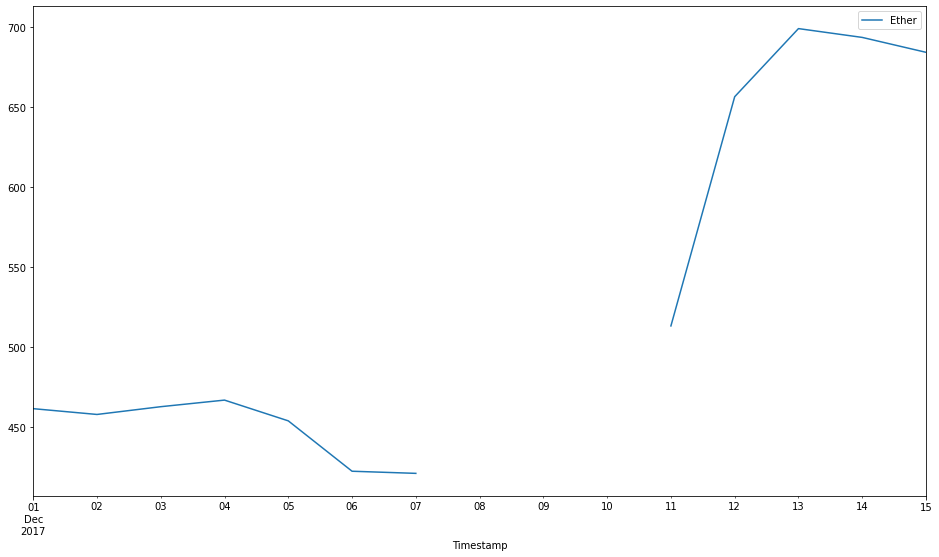

In [25]:
df.loc['2017-12-01':'2017-12-15'].plot(y='Ether', figsize=(16,9))


<AxesSubplot:xlabel='Timestamp'>

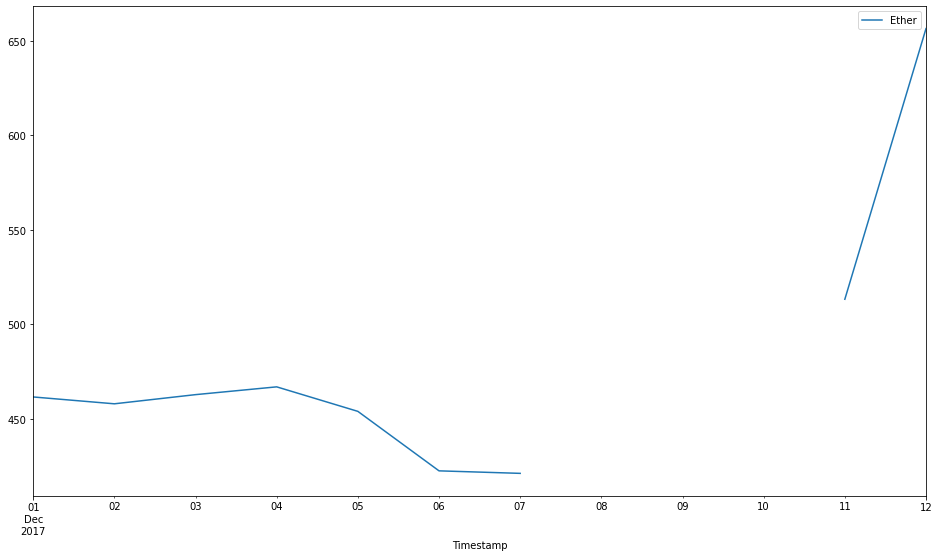

In [26]:
df.loc['2017-12':'2017-12-12'].plot(y='Ether', figsize=(16,9))

In [32]:
Finding null values:

SyntaxError: invalid syntax (<ipython-input-32-0e5defbcb9cd>, line 1)

In [31]:
#null values
df_na = df.loc['2017-12':'2017-12-12']

In [28]:
df_na['Ether'].isna().values.any()

True

In [29]:
#in what time period?
df_na.loc[df_na['Ether'].isna()]

,Bitcoin,Ether
Timestamp,,
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN


In [30]:
df.loc['2017-12-05':'2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,NaN
2017-12-09,15142.834152,NaN
2017-12-10,14869.805000,NaN
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [33]:
Fix missing values.

SyntaxError: invalid syntax (<ipython-input-33-9aaadd32cbe0>, line 1)

In [41]:
#fill null values with mean.
df.loc['2017-12-05':'2017-12-12'].fillna(df.mean())

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.960000
2017-12-06,13540.980000,422.480000
2017-12-07,16501.971667,421.150000
2017-12-08,16007.436667,429.927514
2017-12-09,15142.834152,429.927514
2017-12-10,14869.805000,429.927514
2017-12-11,16762.116667,513.290000
2017-12-12,17276.393333,656.520000


In [39]:
#fill null values with values from above
df.loc['2017-12-05':'2017-12-12'].fillna(method='ffill')

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,421.15
2017-12-09,15142.834152,421.15
2017-12-10,14869.805000,421.15
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [42]:
#drop null values
df.loc['2017-12-05':'2017-12-12'].dropna()

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [43]:
#fill with values from below.
df.loc['2017-12-05':'2017-12-12'].fillna(method='bfill')

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


In [44]:
df.fillna(method='bfill', inplace=True) #make revision on orginial .csv file

In [45]:
df.loc['2017-12-05':'2017-12-12']

,Bitcoin,Ether
Timestamp,,
2017-12-05,11878.433333,453.96
2017-12-06,13540.980000,422.48
2017-12-07,16501.971667,421.15
2017-12-08,16007.436667,513.29
2017-12-09,15142.834152,513.29
2017-12-10,14869.805000,513.29
2017-12-11,16762.116667,513.29
2017-12-12,17276.393333,656.52


<AxesSubplot:xlabel='Timestamp'>

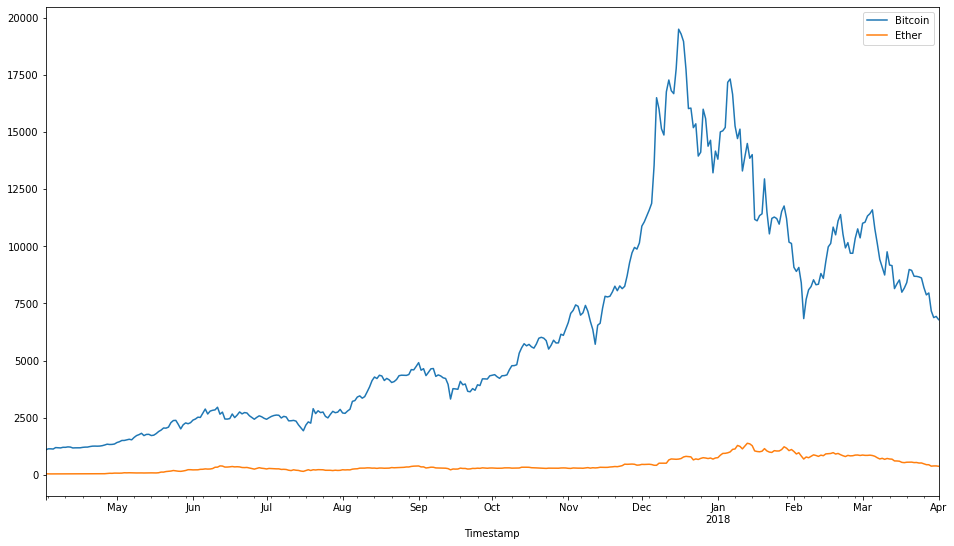

In [46]:
df.plot(figsize=(16,9))